In [1]:
import numpy as np
import overdrivePrototype as OPT   # Add your python class(es)
from utils import *
import librosa as lr
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
overdrive = OPT.Overdrive()
overdrive.gain  = 8         # dB
overdrive.tone  = 0.5       # Hz
overdrive.level = 0.5       # dB


# Plotting Static Curve

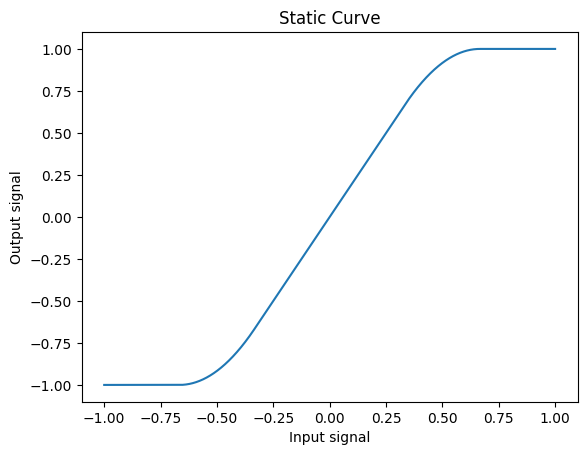

In [3]:
overdrive.plotStaticCurveLinear()

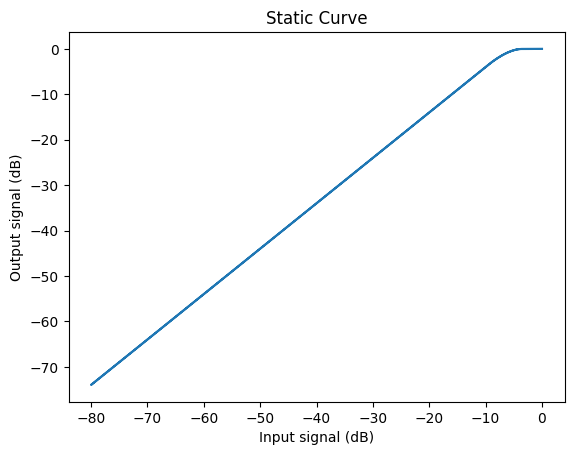

In [4]:
overdrive.plotStaticCurveDecibel()

# Loading Audio Files

In [5]:
pathToAudio = "funkyGuitar2.wav" # set path to an audio file

sampleRate  = 44100         
cleanInput, sampleRate = lr.load(pathToAudio, sr = sampleRate, mono = True, duration = 10)

# Applying Overdrive

In [6]:
clippedOutput = overdrive.applyOverdrive(cleanInput)

In [7]:
ipd.Audio(data = clippedOutput, rate = sampleRate)

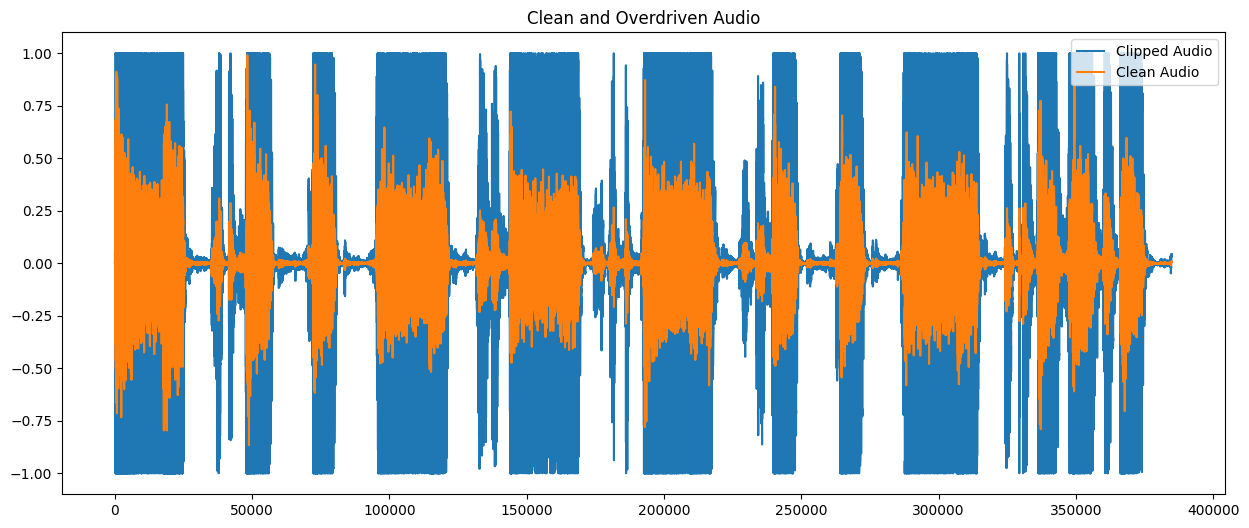

In [8]:
plt.figure(figsize = (15, 6))
plt.title("Clean and Overdriven Audio")
plt.plot(clippedOutput, label = "Clipped Audio")
plt.plot(cleanInput, label = "Clean Audio")
plt.legend(loc = "upper right");

# Testing with Sinusoid

In [9]:
overdrive.gain  = 6

In [10]:
tt  = np.arange(0, 1, 1/sampleRate)
f   = 1000 

cleanSine = np.sin(2 * np.pi * f * tt)
clippedSine = overdrive.applySoftClipping(cleanSine)

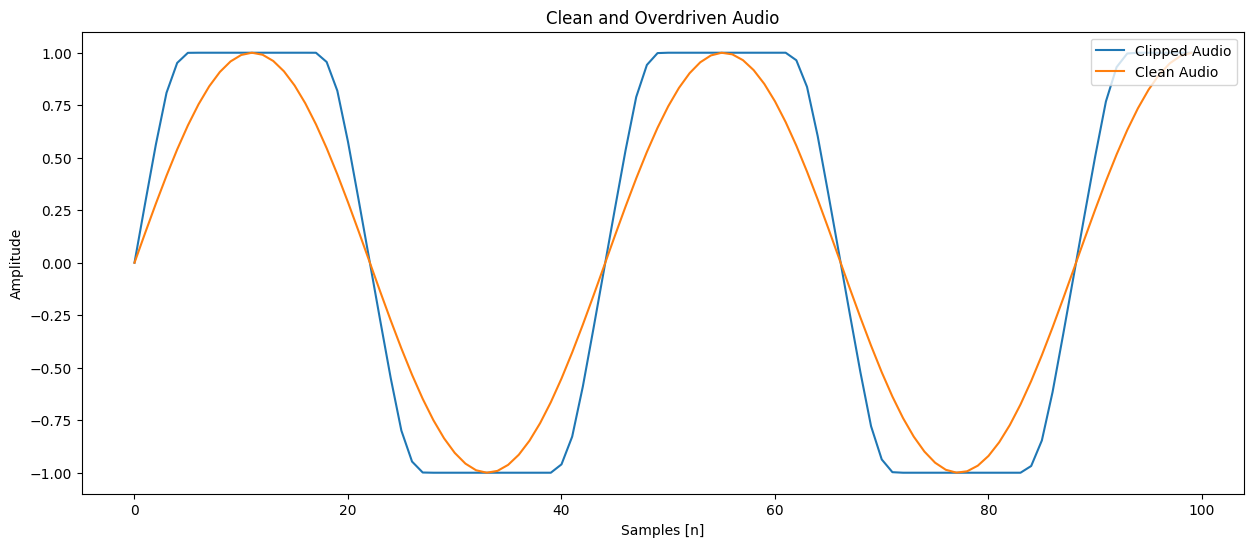

In [14]:
plt.figure(figsize = (15, 6))
plt.title("Clean and Overdriven Audio")
plt.plot(clippedSine[:100], label = "Clipped Audio")
plt.plot(cleanSine[:100], label = "Clean Audio")
plt.xlabel("Samples [n]")
plt.ylabel("Amplitude")
plt.legend(loc = "upper right");

# Spectrogram of Clean Sine

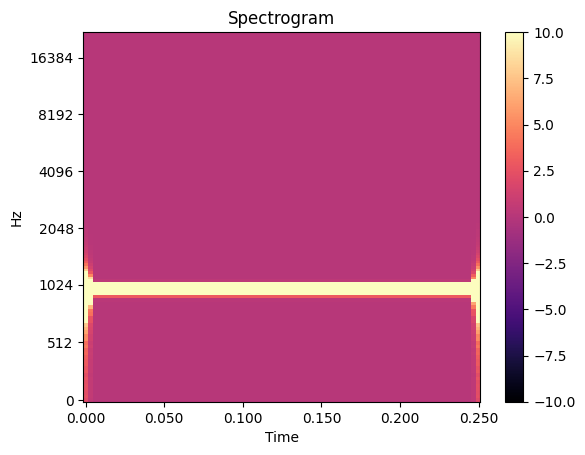

In [12]:
plotSpectrogram(inputSignal = cleanSine, sampleRate = int(sampleRate))

# Spectrogram of Clipped Sine

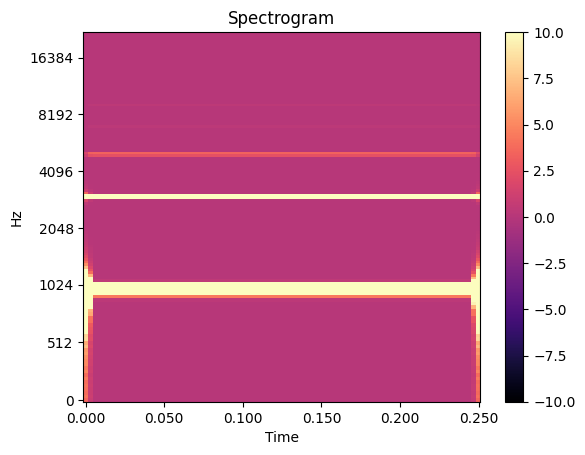

In [13]:
plotSpectrogram(inputSignal = clippedSine, sampleRate = int(sampleRate))